# Proyek Analisis Data: Nama dataset
- Nama: JISRON MALIK
- Email: jisron94@gmail.com
- Id Dicoding: jisron94

## Menentukan Pertanyaan Bisnis

- pertanyaan 1
  Faktor yang membuat user memilih untuk menggunakan sepeda?
- pertanyaan 2
  Bagaimana perubahan perilaku user dalam penggunaan sepeda?

## Menyiapkan semua library yang dibutuhkan

In [14]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Wrangling

### Gathering Data

In [15]:
df = pd.read_csv('/content/day.csv', delimiter=",")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Meload data yang akan digunakan dengan menggunakan library pandas untuk meload file data berupa excel dengan format csv serta menampilkan 5 data teratas

### Assessing Data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


selanjutnya kita mencek info yang terdapat dalam data untuk melihat type data dan total data yang ada

### Cleaning Data

In [17]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Proses selanjutnya kita melakukan pengecekan data kosong yang ada dengan menggunakan fitur isna() sehingga kita mengetahui apakah terdapat dapat kosong pada data yang akan kita gunakan, berdasarkan hasil diatas tidak terdapat data kosong sehingga kita dapat langsung menggunakan data diatas.

In [18]:
df.duplicated().sum()

0

Setelah mencek data kosong selanjutnya kita juga melihat apakah terdapat duplikat data dalam data kita menggunakan fitur duplicated(), berdasarkan hasil tersebut data kita tidak terdapat duplikat data sehingga data kita dapat dikatakan bersih.

## Exploratory Data Analysis (EDA)

In [19]:
df2 = df.groupby(['season','weathersit']).agg({
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed' : 'mean',
    'cnt':'mean',
})
df3 = df2.mask(df2>1,df2/10000).round(2)
df3

temp  atemp   hum  windspeed   cnt
season weathersit                                    
1      1           0.30   0.30  0.51       0.23  0.28
       2           0.29   0.30  0.70       0.19  0.24
       3           0.27   0.26  0.60       0.29  0.09
2      1           0.56   0.54  0.55       0.20  0.55
       2           0.52   0.50  0.74       0.20  0.42
       3           0.37   0.36  0.88       0.30  0.12
3      1           0.72   0.67  0.59       0.17  0.59
       2           0.67   0.63  0.74       0.17  0.52
       3           0.59   0.54  0.90       0.21  0.28
4      1           0.40   0.40  0.60       0.16  0.50
       2           0.45   0.43  0.73       0.18  0.47
       3           0.46   0.44  0.92       0.22  0.20

Disini kita melakukan explorasi data yang akan digunakan untuk proses analisis kedepannya, disini kita telah melakukan pemilihan data yang akan digunakan.

### Explore ...

In [20]:
df3.corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.997863,0.138288,-0.546129,0.710769
atemp,0.997863,1.000000,0.113973,-0.578015,0.742168
hum,0.138288,0.113973,1.000000,0.211181,-0.401914
windspeed,-0.546129,-0.578015,0.211181,1.000000,-0.842180
cnt,0.710769,0.742168,-0.401914,-0.842180,1.000000


Selanjutnya kita melakukan analisi berdasarkan nilai korelasi tersebut, kita dapat menyimpulkan bahwa kolom windspeed di atas tidak memiliki korelasi karena nilainya mendekati nol.
kita akan membuat dataframe baru tanpa menggunakan kolom windspeed.

In [21]:
df4 = df3.drop(columns=['windspeed'])
df4.corr()

,temp,atemp,hum,cnt
temp,1.000000,0.997863,0.138288,0.710769
atemp,0.997863,1.000000,0.113973,0.742168
hum,0.138288,0.113973,1.000000,-0.401914
cnt,0.710769,0.742168,-0.401914,1.000000


disini kita telah melakukan eksekusi data sehingga data yang kita miliki dapat digunakan untuk analisis

## Visualization & Explanatory Analysis

### Pertanyaan 1: Faktor yang membuat user memilih untuk menggunakan sepeda?

In [22]:
df4.nlargest(n=10, columns=['cnt'])

temp  atemp   hum   cnt
season weathersit                         
3      1           0.72   0.67  0.59  0.59
2      1           0.56   0.54  0.55  0.55
3      2           0.67   0.63  0.74  0.52
4      1           0.40   0.40  0.60  0.50
       2           0.45   0.43  0.73  0.47
2      2           0.52   0.50  0.74  0.42
1      1           0.30   0.30  0.51  0.28
3      3           0.59   0.54  0.90  0.28
1      2           0.29   0.30  0.70  0.24
4      3           0.46   0.44  0.92  0.20

disini kita menampilkan urutan 10 data teratas agar dapat mendapatkan insight terhadap data yang kita miliki

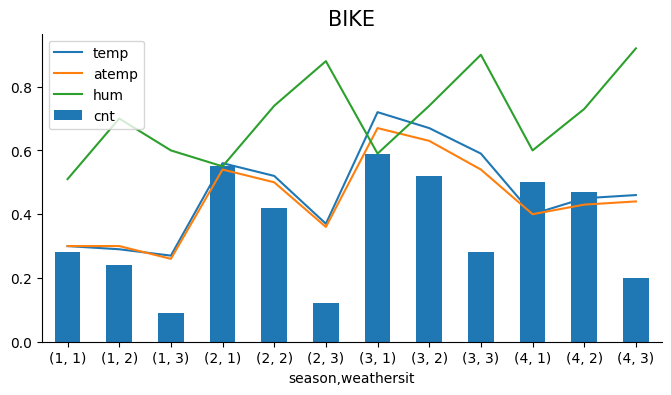

In [23]:
plt.figure(figsize=(8, 4))
plt.title('BIKE', size=15)
df4['cnt'].plot(kind='bar')
df4['temp'].plot(kind='line')
df4['atemp'].plot(kind='line')
df4['hum'].plot(kind='line')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()

disini kita melakukan visualisasi data dengan menggabungkan diagram garis dan batang agar data kita dapat mudah dicerna

<Axes: ylabel='season-weathersit'>

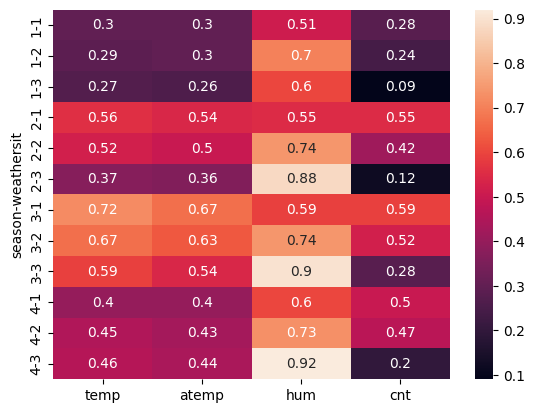

In [24]:
sns.heatmap(df4, annot=True)

disini kita menggunakan heatmap untuk melihat nilai-nilai terbaik dalam data yang kita punya

### Pertanyaan 2:

Bagaimana perubahan perilaku user dalam penggunaan sepeda?

In [25]:
dfs2 = df.groupby(['yr','season']).agg({
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'cnt':'mean',
})
dfs3 = dfs2.mask(dfs2>1,dfs2/10000).round(2)
dfs3

temp  atemp   hum   cnt
yr season                         
0  1       0.27   0.28  0.58  0.17
   2       0.53   0.51  0.66  0.38
   3       0.70   0.65  0.64  0.45
   4       0.43   0.42  0.69  0.37
1  1       0.32   0.32  0.59  0.35
   2       0.55   0.53  0.60  0.62
   3       0.71   0.66  0.62  0.68
   4       0.42   0.41  0.64  0.58

disini kita melakukan pemilihan data agar daat digunakan sesuai dengan kebutuh data yang kita inginkan. Disini saya menggunakan data berdasarkan tahun dan musim

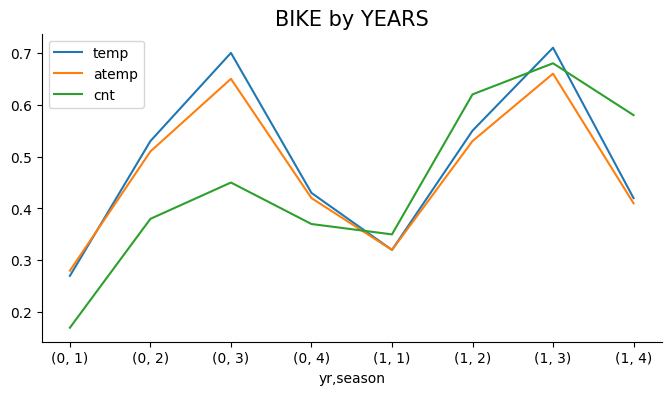

In [26]:
plt.figure(figsize=(8, 4))
plt.title('BIKE by YEARS', size=15)
dfs3['temp'].plot(kind='line')
dfs3['atemp'].plot(kind='line')
dfs3['cnt'].plot(kind='line')
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)

Disini kita menampilkan grafik berdasarkan data yang telah kita pilih sebelumnya

## Conclusion

- Conclution pertanyaan 1

  Terlihat dalam data diatas ada beberapa faktor yang mempengaruhi pengambilan keputusan user dalam memilih untuk menggunakan sepeda, terlihat bahwa rata-rata penggunaan sepeda terbanyak terjadi pada saat nilai temp berada diantara 0.4-0.72, nilai atemp berada diantara 0.4-0.67 dan nilai hum berada diantara 0.55-0.75 dimana pada rentan nilai tersebut tubuh manusia merasa nyaman untuk beraktivitas diluar ruangan.

- Conclution pertanyaan 2
  Berdasarkan pada data dua tahun terakhir dapat diketahui bahwa perilaku user dalam menggunakan sepeda lebih disukai pada saat keaadan cuaca hangat dan kondisi cuaca dalam keadaan relatif cerah, terlihat juga bahwa telah menjadi sebuah tren dalam penggunaan sepeda terjadi pada saat season 2 hingga season 3 sehingga dapat disediakan jumlah sepeda yang jauh lebih banyak dibandingkan pada saat season awal dan akhir tahun dikarenakan suhu udara cenderung lebih rendah dan keadaan cuaca tidak memungkinkan untuk bersepeda.

